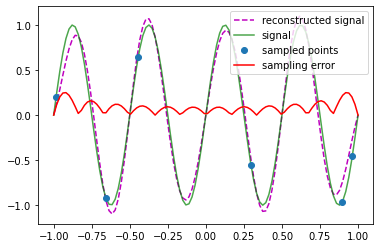

In [ ]:
from numpy import linspace,cos,pi,ceil,floor,arange,sin,sinc,abs, random,array
from pylab import plot,show,axis,legend

# frequency and sampling frequency
f=2
fs=6

#time and sample time
t = linspace(-1,1,100)
ts=arange(-1,1+1/fs,1/fs)
# ts = random.uniform(-1,1,fs)
wsp=len(ts)
#signal reconstruction
s_rec=0
for k in range(-wsp,wsp):
  s_rec+=sin(2*f*pi*(k/fs))*sinc(k-fs*t)
#redonstruction error
r_err=abs(s_rec-sin(2*f*pi*t))
plot(t,s_rec,'--',label='reconstructed signal',color='m')
plot(t,sin(2*f*pi*t),label='signal',alpha=0.7,color='g')
plot(ts,sin(2*f*pi*ts),'o',label='sampled points')
plot(t,r_err,label='sampling error',color='r')
legend(loc='upper right')

Optimization terminated successfully.
         Current function value: 0.983149
         Iterations: 58
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.099870
         Iterations: 54
         Function evaluations: 97
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]
Optimization terminated successfully.
         Current function value: 15.966128
         Iterations: 55
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 104.477332
         Iterations: 59
         Function evaluations: 113


/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2570: RuntimeWarning: divide by zero encountered in double_scalars
  ret **= (1 / ord)
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2570: RuntimeWarning: divide by zero encountered in double_scalars
  ret **= (1 / ord)


<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf5117e10>>

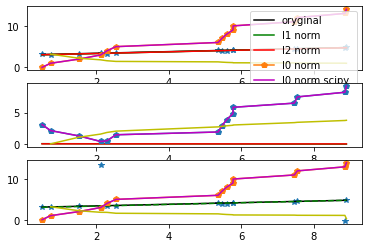

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.linalg import norm
%matplotlib inline
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))
yy = 3 + 0.2 * x

def l1_fit(x0,x,y):
  return np.sum(np.abs(x0[0] * x + x0[1] - y))

def l2_fit(x0,x,y):
  return np.sum(np.power(x0[0] * x + x0[1] - y, 2))
def l_0(y):
  c=0
  l0 =[]
  for i in y:
    l0.append(c) 
    if i!=0:
      c+=1
  return l0
def normlist(y,normtype):
  l = []
  for i in range(len(y)):
    l.append(normtype(y[:i]))
  return l
xopt1 = opt.fmin(func=l1_fit, x0=[1, 1], args=(x, y));
xopt2 = opt.fmin(func=l2_fit, x0=[1, 1], args=(x, y));

y_est1 = xopt1[1] + xopt1[0] * x
y_est2 = xopt2[1] + xopt2[0] * x
l0norm = l_0(y)
l0normmod = normlist(y,lambda y: norm(y,ord=0))
ln2normmod = normlist(y,lambda y: norm(y,ord=-2))
print(l0normmod)
s0 = plt.subplot(311)
s0.plot(x,y,'*')
s0.plot(x,yy,'k', label = 'oryginal')
s0.plot(x,y_est1,'g-',label='l1 norm')
s0.plot(x,y_est2,'r-',label='l2 norm')
s0.plot(x,l0norm,'p-',label='l0 norm')
s0.plot(x,l0normmod,'m-',label='l0 norm scipy')
s0.plot(x,ln2normmod,'y-',label='l-2 norm scipy')
s0.legend()

s1 = plt.subplot(312)
s1.plot(x,abs(y_est1-yy),'g-',label='l1 norm')
s1.plot(x,abs(y_est2-yy),'r-',label='l2 norm')
s1.plot(x,abs(l0norm-yy),'p-',label='l0 norm')
s1.plot(x,abs(l0normmod-yy),'m-',label='l0 norm scipy')
s1.plot(x,abs(ln2normmod-yy),'y-',label='l-2 norm scipy')
s1.legend

y2 = y.copy()
y2[3] += 10
y2[13] -= 5

xopt11 = opt.fmin(func=l1_fit, x0=[1, 1], args=(x, y2))
xopt22 = opt.fmin(func=l2_fit, x0=[1, 1], args=(x, y2))

y_est11 = xopt11[1] + xopt11[0] * x
y_est22 = xopt22[1] + xopt22[0] * x
l0norm = l_0(y2)
l0normmod = normlist(y2,lambda y: norm(y,ord=0))
ln2normmod = normlist(y2,lambda y: norm(y,ord=-2))
s2 = plt.subplot(313)
s2.plot(x,y2,'*')
s2.plot(x,yy, 'k', label='oryginal')
s2.plot(x,y_est11,'g--',label='l1 norm')
s2.plot(x,l0norm,'p-',label='l0 norm')
s2.plot(x,l0normmod,'m-',label='l0 norm scipy')
s2.plot(x,ln2normmod,'y-',label='l-2 norm scipy')
s2.legend